<a href="https://colab.research.google.com/github/adolfoguimaraes/inteligenciaartificial/blob/main/code/09_AlgoritmoGenetico_Parte3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo Genético - O problema da Mochila



In [ ]:
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

# O problema da Mochila

Classe da mochila disponível em:
https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter04/knapsack.py

In [ ]:
class Knapsack01Problem:
    """This class encapsulates the Knapsack 0-1 Problem from RosettaCode.org
    """

    def __init__(self):

        # initialize instance variables:
        self.items = []
        self.maxCapacity = 0

        # initialize the data:
        self.__initData()

    def __len__(self):
        """
        :return: the total number of items defined in the problem
        """
        return len(self.items)

    def __initData(self):
        """initializes the RosettaCode.org knapsack 0-1 problem data
        """
        self.items = [
            ("map", 9, 150),
            ("compass", 13, 35),
            ("water", 153, 200),
            ("sandwich", 50, 160),
            ("glucose", 15, 60),
            ("tin", 68, 45),
            ("banana", 27, 60),
            ("apple", 39, 40),
            ("cheese", 23, 30),
            ("beer", 52, 10),
            ("suntan cream", 11, 70),
            ("camera", 32, 30),
            ("t-shirt", 24, 15),
            ("trousers", 48, 10),
            ("umbrella", 73, 40),
            ("waterproof trousers", 42, 70),
            ("waterproof overclothes", 43, 75),
            ("note-case", 22, 80),
            ("sunglasses", 7, 20),
            ("towel", 18, 12),
            ("socks", 4, 50),
            ("book", 30, 10)
        ]

        self.maxCapacity = 400

    def getValue(self, zeroOneList):
        """
        Calculates the value of the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        :return: the calculated value
        """

        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                totalWeight += zeroOneList[i] * weight
                totalValue += zeroOneList[i] * value
        return totalValue

    def printItems(self, zeroOneList):
        """
        Prints the selected items in the list, while ignoring items that will cause the accumulating weight to exceed the maximum weight
        :param zeroOneList: a list of 0/1 values corresponding to the list of the problem's items. '1' means that item was selected.
        """
        totalWeight = totalValue = 0

        for i in range(len(zeroOneList)):
            item, weight, value = self.items[i]
            if totalWeight + weight <= self.maxCapacity:
                if zeroOneList[i] > 0:
                    totalWeight += weight
                    totalValue += value
                    print("- Adding {}: weight = {}, value = {}, accumulated weight = {}, accumulated value = {}".format(item, weight, value, totalWeight, totalValue))
        print("- Total weight = {}, Total value = {}".format(totalWeight, totalValue))



### Testando a classe da mochila

In [ ]:
# create a problem instance:
knapsack = Knapsack01Problem()

    # creaete a random solution and evaluate it:
randomSolution = np.random.randint(2, size=len(knapsack))
print("Random Solution = ")
print(randomSolution)
knapsack.printItems(randomSolution)

Random Solution = 
[1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 1 0]
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding tin: weight = 68, value = 45, accumulated weight = 243, accumulated value = 430
- Adding banana: weight = 27, value = 60, accumulated weight = 270, accumulated value = 490
- Adding apple: weight = 39, value = 40, accumulated weight = 309, accumulated value = 530
- Adding t-shirt: weight = 24, value = 15, accumulated weight = 333, accumulated value = 545
- Adding waterproof trousers: weight = 42, value = 70, accumulated weight = 375, accumulated value = 615
- Adding towel: weight = 18, value = 12, accumulated weight = 393, accumulated value = 627
- Adding socks: weight = 4, value = 50, accumulated weight = 397, accumulated value = 677
- Total weig

## Algoritmo Genético para o problema da Mochila

Código disponívem em: https://github.com/PacktPublishing/Hands-On-Genetic-Algorithms-with-Python/blob/master/Chapter04/01-solve-knapsack.py

In [ ]:
# problem constants:
# create the knapsack problem instance to be used:
knapsack = Knapsack01Problem()

# Genetic Algorithm constants:
POPULATION_SIZE = 20
P_CROSSOVER = 0.2  # probability for crossover
P_MUTATION = 0.8   # probability for mutating an individual
MAX_GENERATIONS = 20
HALL_OF_FAME_SIZE = 1


# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

del creator.FitnessMax
# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

del creator.Individual
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(knapsack))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


# fitness calculation
def knapsackValue(individual):
    return knapsack.getValue(individual),  # return a tuple


toolbox.register("evaluate", knapsackValue)

# genetic operators:mutFlipBit

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxTwoPoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(knapsack))




Execução do algoritmo

gen	nevals	max	avg   
0  	20    	760	546.05
1  	18    	880	677.5 
2  	19    	880	771.55
3  	18    	910	836.85
4  	18    	910	841.2 
5  	16    	952	879.35
6  	16    	930	865.9 
7  	15    	932	861.9 
8  	16    	932	878.75
9  	16    	952	895.25
10 	18    	952	883.2 
11 	17    	952	904.45
12 	18    	952	920.35
13 	17    	952	896.2 
14 	16    	952	906.95
15 	16    	952	905.55
16 	17    	952	905.35
17 	19    	970	881   
18 	17    	970	906.8 
19 	19    	970	914.8 
20 	19    	970	913.25
-- Best Ever Individual =  [1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1]
-- Best Ever Fitness =  970.0
-- Knapsack Items = 
- Adding map: weight = 9, value = 150, accumulated weight = 9, accumulated value = 150
- Adding compass: weight = 13, value = 35, accumulated weight = 22, accumulated value = 185
- Adding water: weight = 153, value = 200, accumulated weight = 175, accumulated value = 385
- Adding sandwich: weight = 50, value = 160, accumulated weight = 225, accumulated value = 545
- Ad

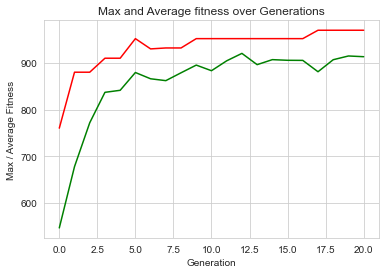

In [ ]:
# Genetic Algorithm flow:


# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print best solution found:
best = hof.items[0]
print("-- Best Ever Individual = ", best)
print("-- Best Ever Fitness = ", best.fitness.values[0])

print("-- Knapsack Items = ")
knapsack.printItems(best)

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average fitness over Generations')
plt.show()

## Atividade

* Modifique os parâmatros do algoritmo genético para gerar novas soluções para o problema. Tente melhorar o resultado anterior. Gere gráficos da evolução para cada conjunto de parâmetros e avalie o resultado. 